# Revision 
Lets do all we did until now in professional manner: <br>
- Choose a random linear function to generate the data.
  * Let y= mx + c , taking m=weight=0.5, bias=0.9 enerate 100 value for x and y.
  * Now break this data into training and testing datasets.
  * Now visualise the data through graph.
- Create a model.
  * Create the model's child class inheriting nn.Module.
  * Create the constructor inside the class, initialize parameters.(Initialization step)
  * Create forward method to compute the predictions.
  * create an instance/object of the class and call the for
  * Make a prediction, obv it will be wrong since we didnt train the model yet, just checking its initial state.
  * Plot the prediction over the graph to see where our model stands in current state, see whether everything is fair until now.
- Training the model.
  * Choose a Loss function, for our problem its MAE: mean absoulute error i.e. L1Loss from pytorch library.
  * Choose an optimizer, for our model its SGD: standard gradient descent.
  * Create the training loop :
     - set the number of epochs.
     - set the model to training mode(model.train()).
     - forward pass the values (find y_preds for X_train).
     - find the loss(y_pred to y_train).
     - zero out the optimizer's gradients since pytorch accumulates gradients by default; if not zeroed out calculations become wrong.
     - find the backward loss(backpropagation, calculates new grads)
     - move the optimizer to next step
    

In [1]:
# importing
try: 
    import torch
    import numpy
    import matplotlib.pyplot as plt
    from torch import nn # nn-> all te building blocks for a neural network
    from pathlib import Path
    print("Done Successfully")
except Exception as e:
    print("Failed to import",e)


Done Successfully


In [2]:
# define the generator method 

def generate_data(m,c):
    start=0
    end=1 #define starting , ending and step values 
    step=0.02

    X=torch.arange(start,end,step).unsqueeze(dim=1) # taking values of x as input
    
    # define the function 
    y=m*X + c # taking values of y as output

    return (X, y) # check the first 10 values of x and y.



In [3]:
# take the values of weight and bias from the user to make the full use of functions.\
weight=0.7 # float(input("Weight?"))
bias=0.4  # float(input("Bias?"))

# check out values of x and y by calling the method
X,y= generate_data(weight,bias) # generate and store the data in X and y

print(X[:10], y[:10]) # check our data 

# check the shape of our data:
print(X.shape,"\n", y.shape)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.4000],
        [0.4140],
        [0.4280],
        [0.4420],
        [0.4560],
        [0.4700],
        [0.4840],
        [0.4980],
        [0.5120],
        [0.5260]])
torch.Size([50, 1]) 
 torch.Size([50, 1])


In [4]:
# create training and testing datasets:(80% training, 20% testing)
length=len(X)

X_train=X[:int(length*0.8)] # training
y_train=y[:int(length*0.8)] 

X_test=X[int(length*0.8):]  # testing
y_test=y[int(length*0.8):] 

print("X_train:",X_train.shape,"\n","y_train:",y_train.shape,"\n","x_test:",X_test.shape,"\n","y_test:",y_test.shape)
# successful split

X_train: torch.Size([40, 1]) 
 y_train: torch.Size([40, 1]) 
 x_test: torch.Size([10, 1]) 
 y_test: torch.Size([10, 1])


In [5]:
# Plot the values of X, y and predictions if available:
def visualise_data(
    X_train_axis=X_train,
    y_train_axis=y_train,
    X_test_axis=X_test,
    y_test_axis=y_test,
    y_pred_axis=None
):
    plt.style.use("dark_background")

    plt.figure(figsize=(15,10))

    # training data
    plt.scatter(X_train_axis, y_train_axis, c="white", s=4, label="Training Data")

    # test data
    plt.scatter(X_test_axis, y_test_axis, c="cyan", s=4, label="Test Data")

    # predictions
    if y_pred_axis is not None:
        plt.scatter(X_test_axis, y_pred_axis, c="red", s=4, label="Predictions")

    plt.grid(True, color="white", alpha=0.25)
    plt.legend(prop={"size":14}, facecolor="black", edgecolor="white")
    plt.xlabel("X axis", color="white")
    plt.ylabel("Y axis", color="white")

    plt.show()


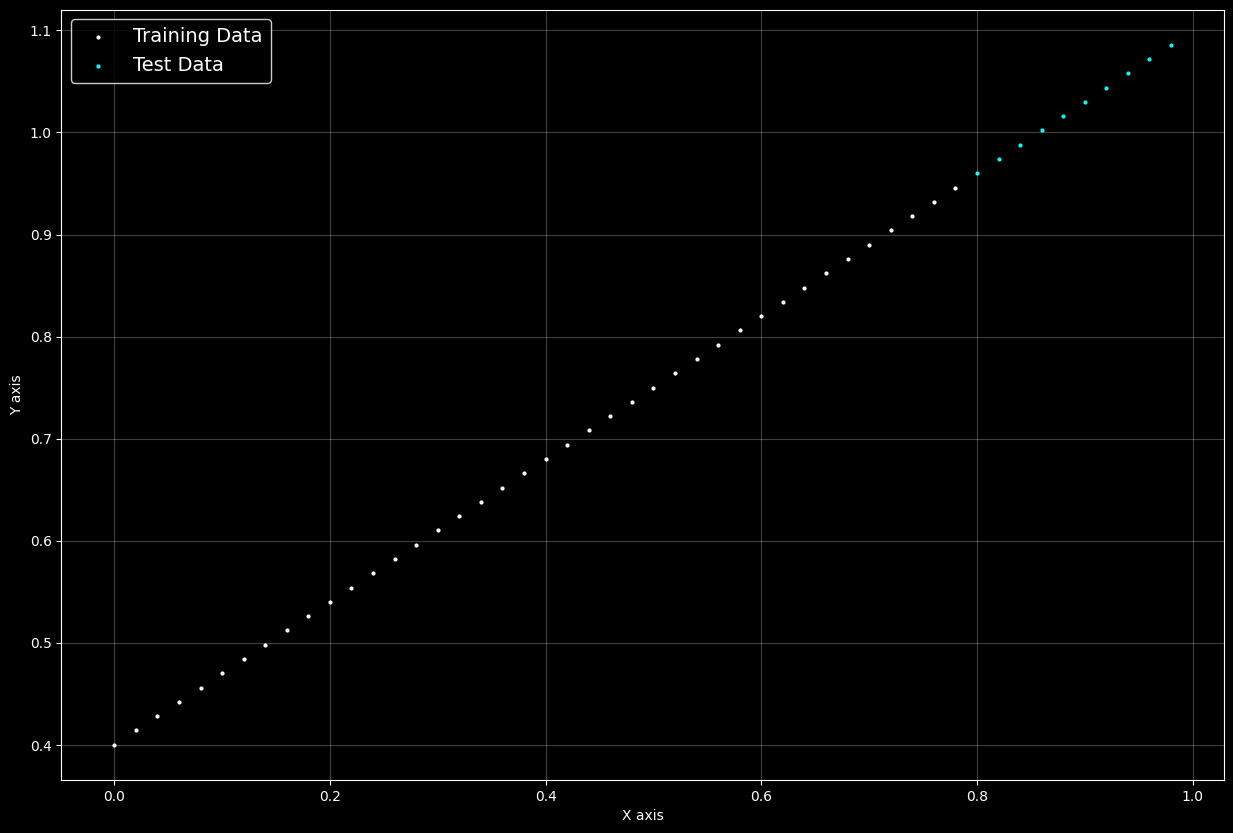

In [6]:
# generate the graph: , and here we are finished with data creation steps
visualise_data()

In [7]:
# create a class that inherits nn.Module since it has all the necessary methods
# model only does y=mx+c, nothing else happens inside the model.
class My_first_model(nn.Module):

    # 1. Inittialization Step: inside the constructor, define parameters on which the model is to be trained
    def __init__(self):
        super().__init__() # always the first line inside` __init__(self)`, enables parameter tracking, optimizer consistency and model behaves correctly
        #start with a random weight & bias then adjust them to ideal weight
        self.weight=nn.Parameter(torch.randn(1))
        self.bias=nn.Parameter(torch.randn(1))

    # 2. Forward method Step: create forward method to compute predictions.
    def forward(self, X:torch.Tensor): # x-> hints/ improves readibility by telling the type of x is a tensor 
        return (self.weight*X + self.bias) # our formula to return the value of y_preds per value of X.

In [8]:
# now check the parameters, show the random weight and bias chosen by the model
# set a manual seed for reproducibility 
seed=42
torch.manual_seed(seed)

#create an instance of the class 
model_1=My_first_model()

# now print the parameters: 
print(model_1.state_dict()) # note that state_dict only has weight and bias which we are predicting 

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [9]:
# now make a prediction with our model 
model_1.eval() # turns off dropout and batchnorm 
with torch.inference_mode(): # turns off gradient tracking overall speeding up the testing process- always.
    y_preds=model_1(X_test) # get the first guess 


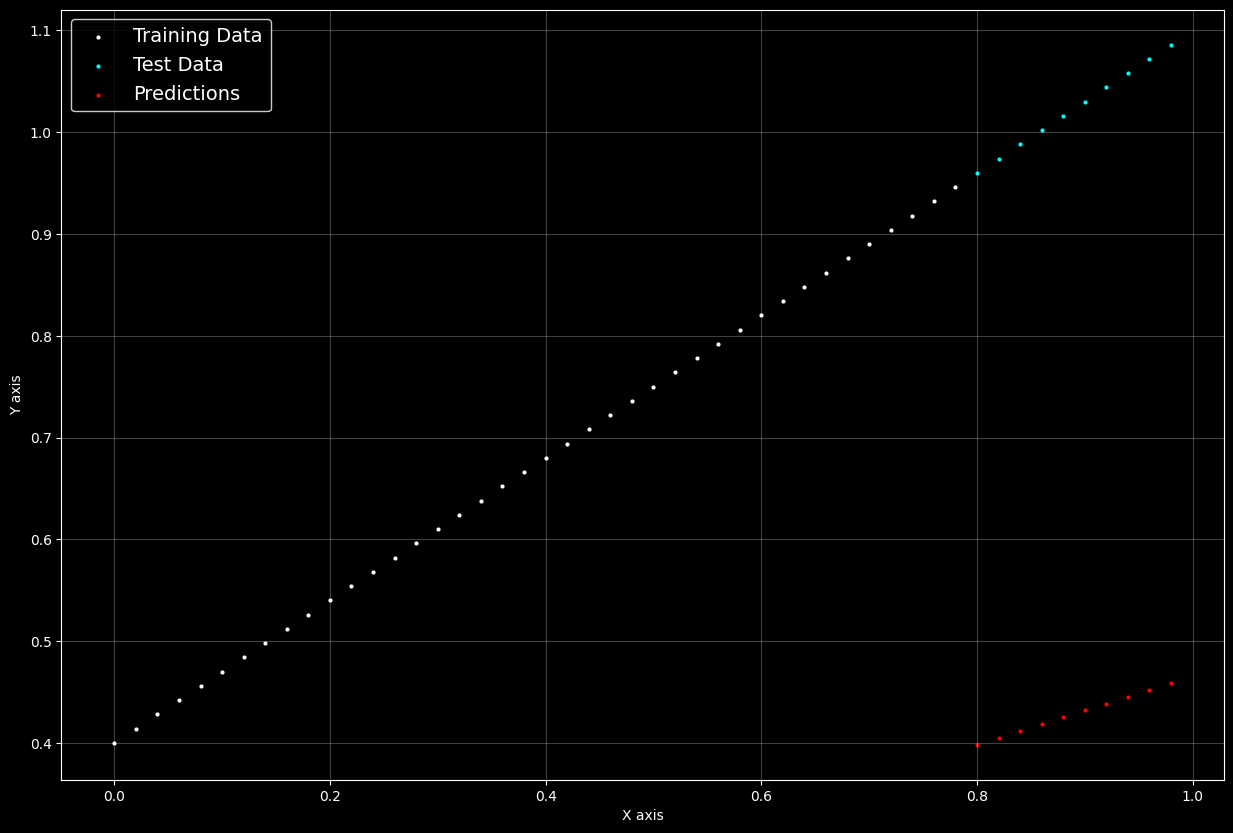

In [10]:
# generate the graph again to see our data clearly
visualise_data(y_pred_axis=y_preds)

In [11]:
# # Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [12]:
# now create a loss function:
loss_fx=nn.L1Loss() # MAE is L1Loss 

# choose and set up an optimiser with model's parameters, SGD in our case
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.017) # lr is the value with which the parameters change per epoch.

In [13]:
# Training
def train_model(): 
    '''
    Forward pass        → y_pred
    Loss computed       → loss
    zero_grad()         → wipe old gradients
    backward()          → compute new gradients
    optimizer.step()    → update weights & bias
    '''
    # set model to training mode :
    model_1.train()

    # get the predictions. 
    y_preds=model_1(X_train)

    # find the loss fx(preds, target)
    loss=loss_fx(y_preds, y_train)

    # set the optimizer to zero 
    optimizer.zero_grad()

    # find backward loss 
    loss.backward() # finds new gradients

    # update the weights and bias 
    optimizer.step()

        
    return loss.item()

In [14]:
# Testing
def test_model(): 
    # track testing loss values 
    epoch_count=[]
    test_loss=[]

    # set model to testing mode :
    model_1.eval()
    with torch.inference_mode():
        test_preds=model_1(X_test)
    
    # find the loss fx(preds, target)
    loss=loss_fx(test_preds, y_test)
    
    return loss.item()

In [15]:
# set the number of epochs 
epochs=98
# track training/testing loss values 
epoch_count=[]
train_loss=[]
test_loss=[]
for epoch in range(epochs):
    train_loss.append(train_model())
    test_loss.append(test_model())
    epoch_count.append(epoch)
    if epoch % 10==0:
        print(f'Train_loss: {train_loss[epoch]} | Test_loss: {test_loss[epoch]}')
print(model_1.state_dict())
print(f'Actual weight={weight} | Actual Bias={bias}')

Train_loss: 0.41288137435913086 | Test_loss: 0.5716354250907898
Train_loss: 0.21702437102794647 | Test_loss: 0.3426284193992615
Train_loss: 0.054714787751436234 | Test_loss: 0.14260680973529816
Train_loss: 0.037908751517534256 | Test_loss: 0.09020251035690308
Train_loss: 0.03201143443584442 | Test_loss: 0.07380403578281403
Train_loss: 0.026173342019319534 | Test_loss: 0.05974100902676582
Train_loss: 0.020327391102910042 | Test_loss: 0.04567800089716911
Train_loss: 0.014498166739940643 | Test_loss: 0.032782696187496185
Train_loss: 0.008657237514853477 | Test_loss: 0.018719667568802834
Train_loss: 0.0029171407222747803 | Test_loss: 0.008265716023743153
OrderedDict([('weight', tensor([0.6936])), ('bias', tensor([0.4102]))])
Actual weight=0.7 | Actual Bias=0.4


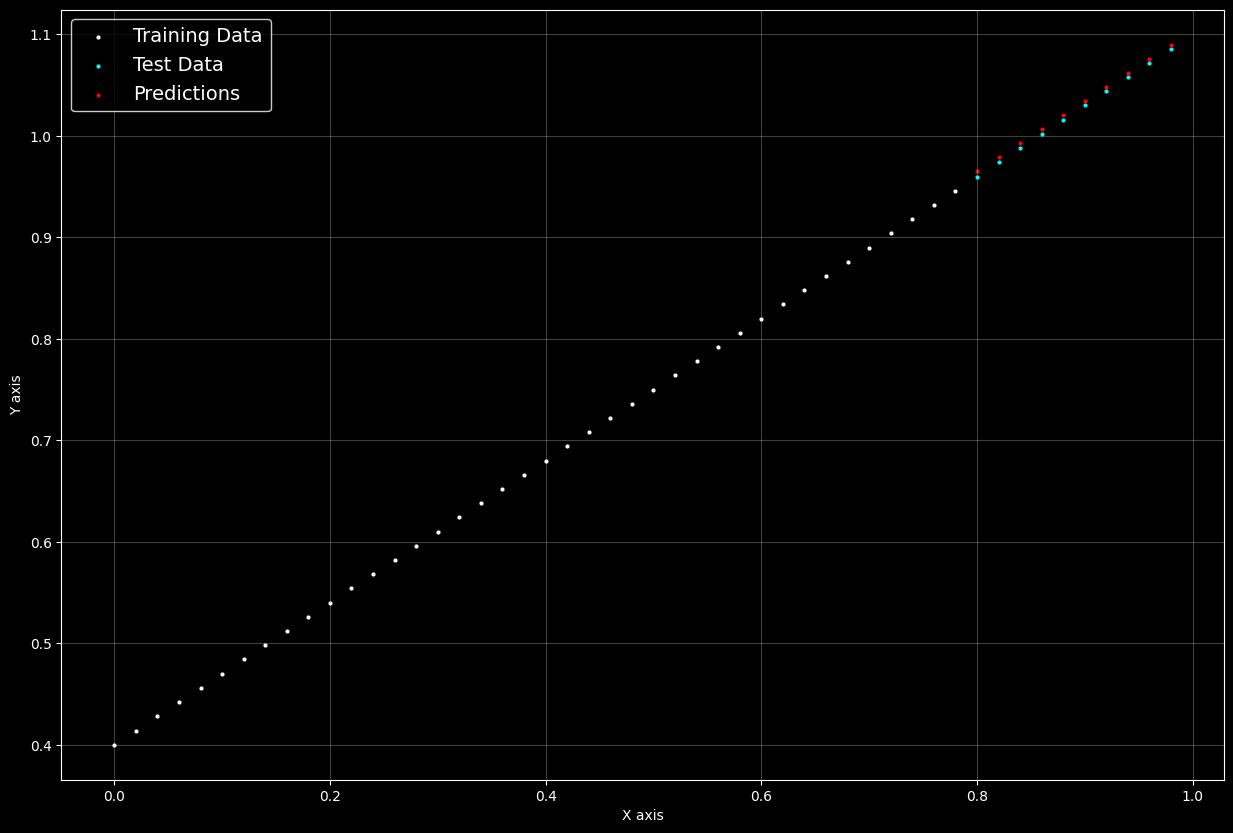

In [16]:
# visualise predictions now 
model_1.eval()
with torch.inference_mode():
    y_test_preds  = model_1(X_test)
visualise_data(y_pred_axis=y_test_preds)

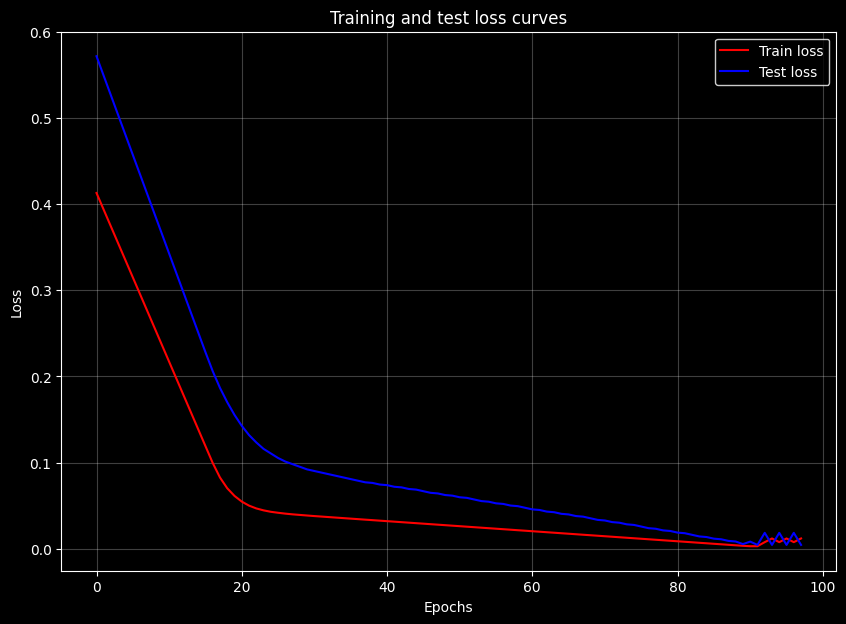

In [17]:
# plot these two on the graph and see where they meet
plt.style.use("dark_background")

plt.figure(figsize=(10,7))

plt.plot(epoch_count, train_loss, color="red", label="Train loss")
plt.plot(epoch_count, test_loss, color="blue", label="Test loss")

plt.title("Training and test loss curves", color="white")
plt.xlabel("Epochs", color="white")
plt.ylabel("Loss", color="white")

plt.grid(True, color="white", alpha=0.25)
plt.legend(facecolor="black", edgecolor="white")

plt.show()


In [18]:
# save the model
save_dir=Path("models")
save_dir.mkdir(parents=True, exist_ok=True)

model_name="model_1.pth"
save_path=save_dir/model_name
print(save_path)

print(f'Saving model to: {save_path}')
torch.save(obj=model_1.state_dict(),
          f=save_path)


models/model_1.pth
Saving model to: models/model_1.pth


In [19]:
'''since we saved the models state dict instead of the entire model, 
   we will load the state dict in a new instance of our model'''
loaded_model_0=My_first_model()

# now loading our pytorch model into the instance we just created
loaded_model_0.load_state_dict(torch.load(f=save_path))

<All keys matched successfully>

In [20]:
# make some predictions with out loaded model:
loaded_model_0.eval() # set it in evaluation mode
with torch.inference_mode():
    loaded_model_preds= loaded_model_0(X_test)

loaded_model_preds

tensor([[0.9650],
        [0.9789],
        [0.9928],
        [1.0066],
        [1.0205],
        [1.0344],
        [1.0483],
        [1.0621],
        [1.0760],
        [1.0899]])

In [21]:
# check the loaded model's state dict in comparison to original model and confirm
print(loaded_model_0.state_dict()==model_1.state_dict())

True
